In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import glob
glob.glob(r'/Users/puravdoshi/Desktop/Data Analysis with Python/Data Analytics Projects/S_and_P_TimeSeries/individual_stocks_5yr/*csv')

['/Users/puravdoshi/Desktop/Data Analysis with Python/Data Analytics Projects/S_and_P_TimeSeries/individual_stocks_5yr/XRX_data.csv',
 '/Users/puravdoshi/Desktop/Data Analysis with Python/Data Analytics Projects/S_and_P_TimeSeries/individual_stocks_5yr/GS_data.csv',
 '/Users/puravdoshi/Desktop/Data Analysis with Python/Data Analytics Projects/S_and_P_TimeSeries/individual_stocks_5yr/SPGI_data.csv',
 '/Users/puravdoshi/Desktop/Data Analysis with Python/Data Analytics Projects/S_and_P_TimeSeries/individual_stocks_5yr/MTB_data.csv',
 '/Users/puravdoshi/Desktop/Data Analysis with Python/Data Analytics Projects/S_and_P_TimeSeries/individual_stocks_5yr/V_data.csv',
 '/Users/puravdoshi/Desktop/Data Analysis with Python/Data Analytics Projects/S_and_P_TimeSeries/individual_stocks_5yr/CTAS_data.csv',
 '/Users/puravdoshi/Desktop/Data Analysis with Python/Data Analytics Projects/S_and_P_TimeSeries/individual_stocks_5yr/ESRX_data.csv',
 '/Users/puravdoshi/Desktop/Data Analysis with Python/Data Ana

In [3]:
len(glob.glob(r'/Users/puravdoshi/Desktop/Data Analysis with Python/Data Analytics Projects/S_and_P_TimeSeries/individual_stocks_5yr/*csv'))

509

In [4]:
company_list=[
    r'/Users/puravdoshi/Desktop/Data Analysis with Python/Data Analytics Projects/S_and_P_TimeSeries/individual_stocks_5yr/AAPL_data.csv',
    r'/Users/puravdoshi/Desktop/Data Analysis with Python/Data Analytics Projects/S_and_P_TimeSeries/individual_stocks_5yr/AMZN_data.csv',
    r'/Users/puravdoshi/Desktop/Data Analysis with Python/Data Analytics Projects/S_and_P_TimeSeries/individual_stocks_5yr/GOOG_data.csv',
    r'/Users/puravdoshi/Desktop/Data Analysis with Python/Data Analytics Projects/S_and_P_TimeSeries/individual_stocks_5yr/MSFT_data.csv'
]

In [5]:
import warnings
from warnings import filterwarnings 
filterwarnings('ignore')

In [6]:
all_data=pd.DataFrame()
for file in company_list:
    current_df=pd.read_csv(file)
    all_data=pd.concat([all_data,current_df],ignore_index=True)
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [7]:
all_data.shape
tech_list=all_data['Name'].unique()
tech_list

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

In [8]:
# Checking and removing duplicates
all_data[all_data.duplicated()].shape

(0, 7)

In [9]:
# Checking and removing missing values
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [10]:
# Checking the data type of the columns
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [11]:
# Converting the date to DateTime data type
all_data['date']=pd.to_datetime(all_data['date']) 
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [12]:

# Enumerate function in Python
'''
The enumerate() function takes in two parameters: iterable and start.
iterable - is the data collection passed in to be returned as an enumerate object.
start - is the starting index for the enumerate object. 
        The default value is 0 so if you omit this parameter, 0 will be used as the first index.
'''
names = ["John", "Jane", "Doe"]
enumNames = enumerate(names, 10)

print(list(enumNames))
# Output - [(10, 'John'), (11, 'Jane'), (12, 'Doe')]

[(10, 'John'), (11, 'Jane'), (12, 'Doe')]


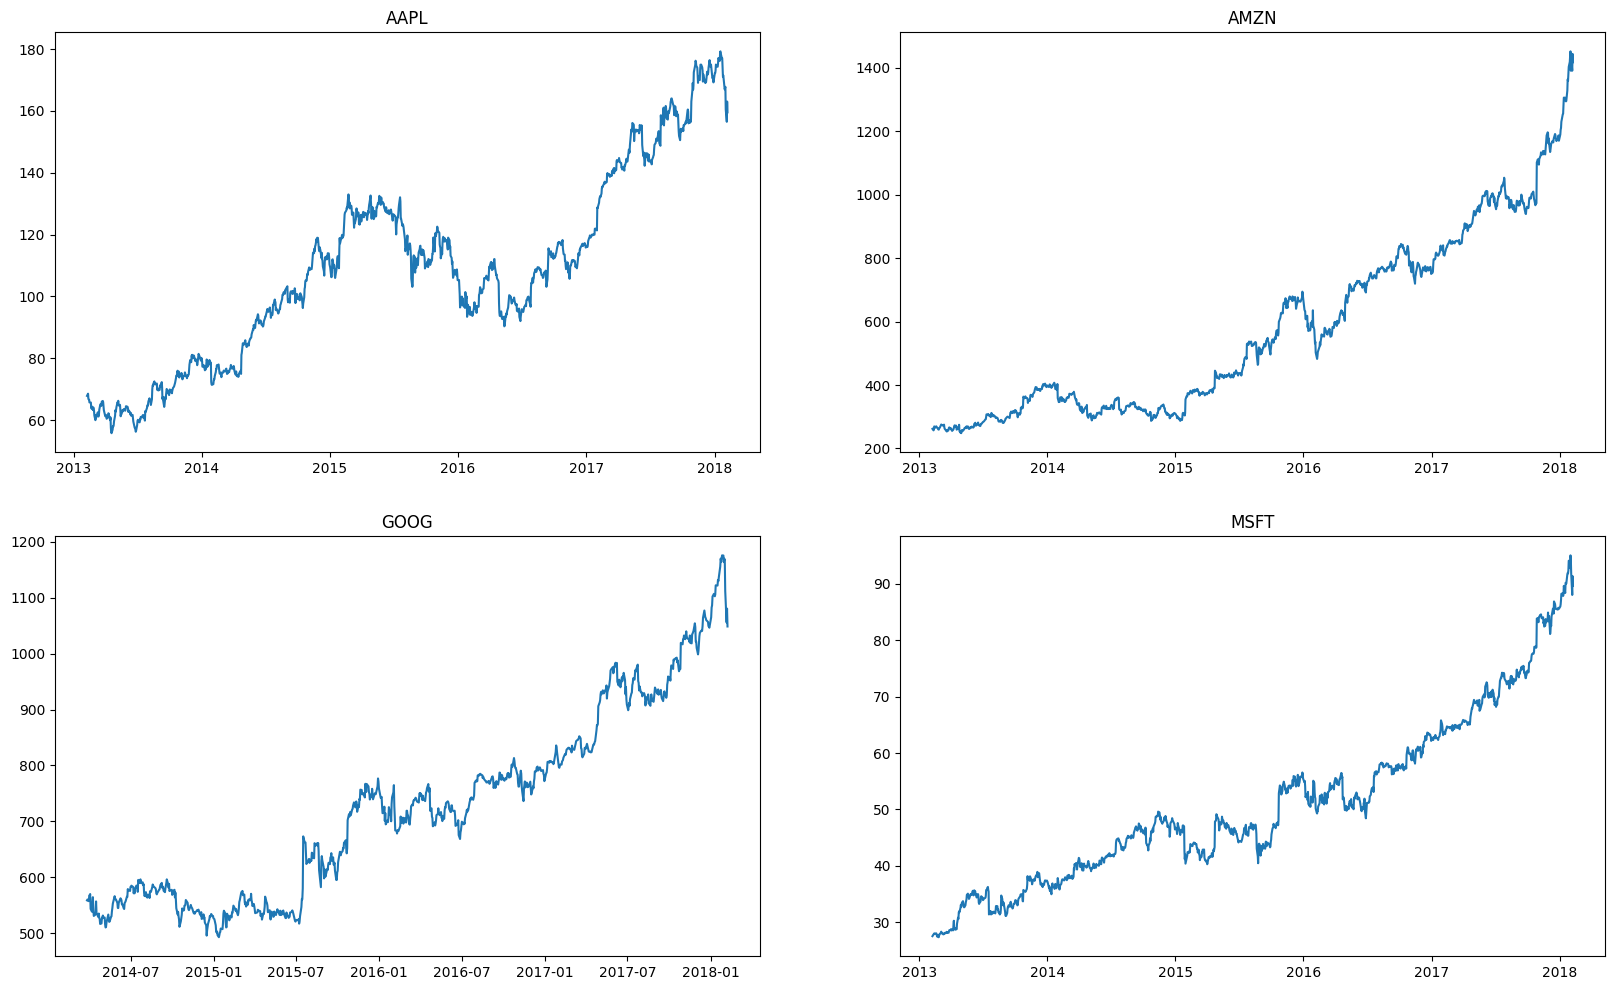

In [13]:
# Plotting the closing price of all companies
plt.figure(figsize=(20,12))
for index, company in enumerate(tech_list , 1):
    plt.subplot(2, 2, index) 
    filter1 = all_data['Name']==company
    df = all_data[filter1]
    plt.plot(df['date'] , df['close']) 
    plt.title(company)

In [14]:
# Analysis of moving averages
all_data['close'].rolling(window=10).mean().head(20)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     66.03251
10    65.57280
11    65.13051
12    64.79722
13    64.43137
14    63.91538
15    63.34238
16    62.93029
17    62.59903
18    62.37792
19    62.10520
Name: close, dtype: float64

In [15]:
new_data=all_data.copy()

In [16]:
ma_day=[10,20,50]
for day in ma_day:
    new_data[f'close_{day}']=new_data['close'].rolling(window=day).mean()
new_data.tail(10)

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
4742,2018-01-25,92.465,93.240,91.9300,92.33,26383238,MSFT,90.393,88.6410,85.9292
4743,2018-01-26,93.120,94.060,92.5800,94.06,29172167,MSFT,90.991,89.0585,86.1318
4744,2018-01-29,95.140,95.450,93.7200,93.92,31569940,MSFT,91.423,89.4685,86.3292
4745,2018-01-30,93.300,93.660,92.1000,92.74,38635053,MSFT,91.862,89.8285,86.5244
4746,2018-01-31,93.750,95.400,93.5100,95.01,48756338,MSFT,92.349,90.2815,86.7606
4747,2018-02-01,94.790,96.070,93.5813,94.26,47227882,MSFT,92.765,90.6770,86.9978
4748,2018-02-02,93.640,93.970,91.5000,91.78,47867753,MSFT,92.943,90.9105,87.1828
4749,2018-02-05,90.560,93.240,88.0000,88.00,51031465,MSFT,92.582,90.9010,87.2684
4750,2018-02-06,86.890,91.475,85.2500,91.33,67998564,MSFT,92.525,91.0535,87.4328
4751,2018-02-07,90.490,91.770,89.2000,89.61,41107592,MSFT,92.304,91.1230,87.5598


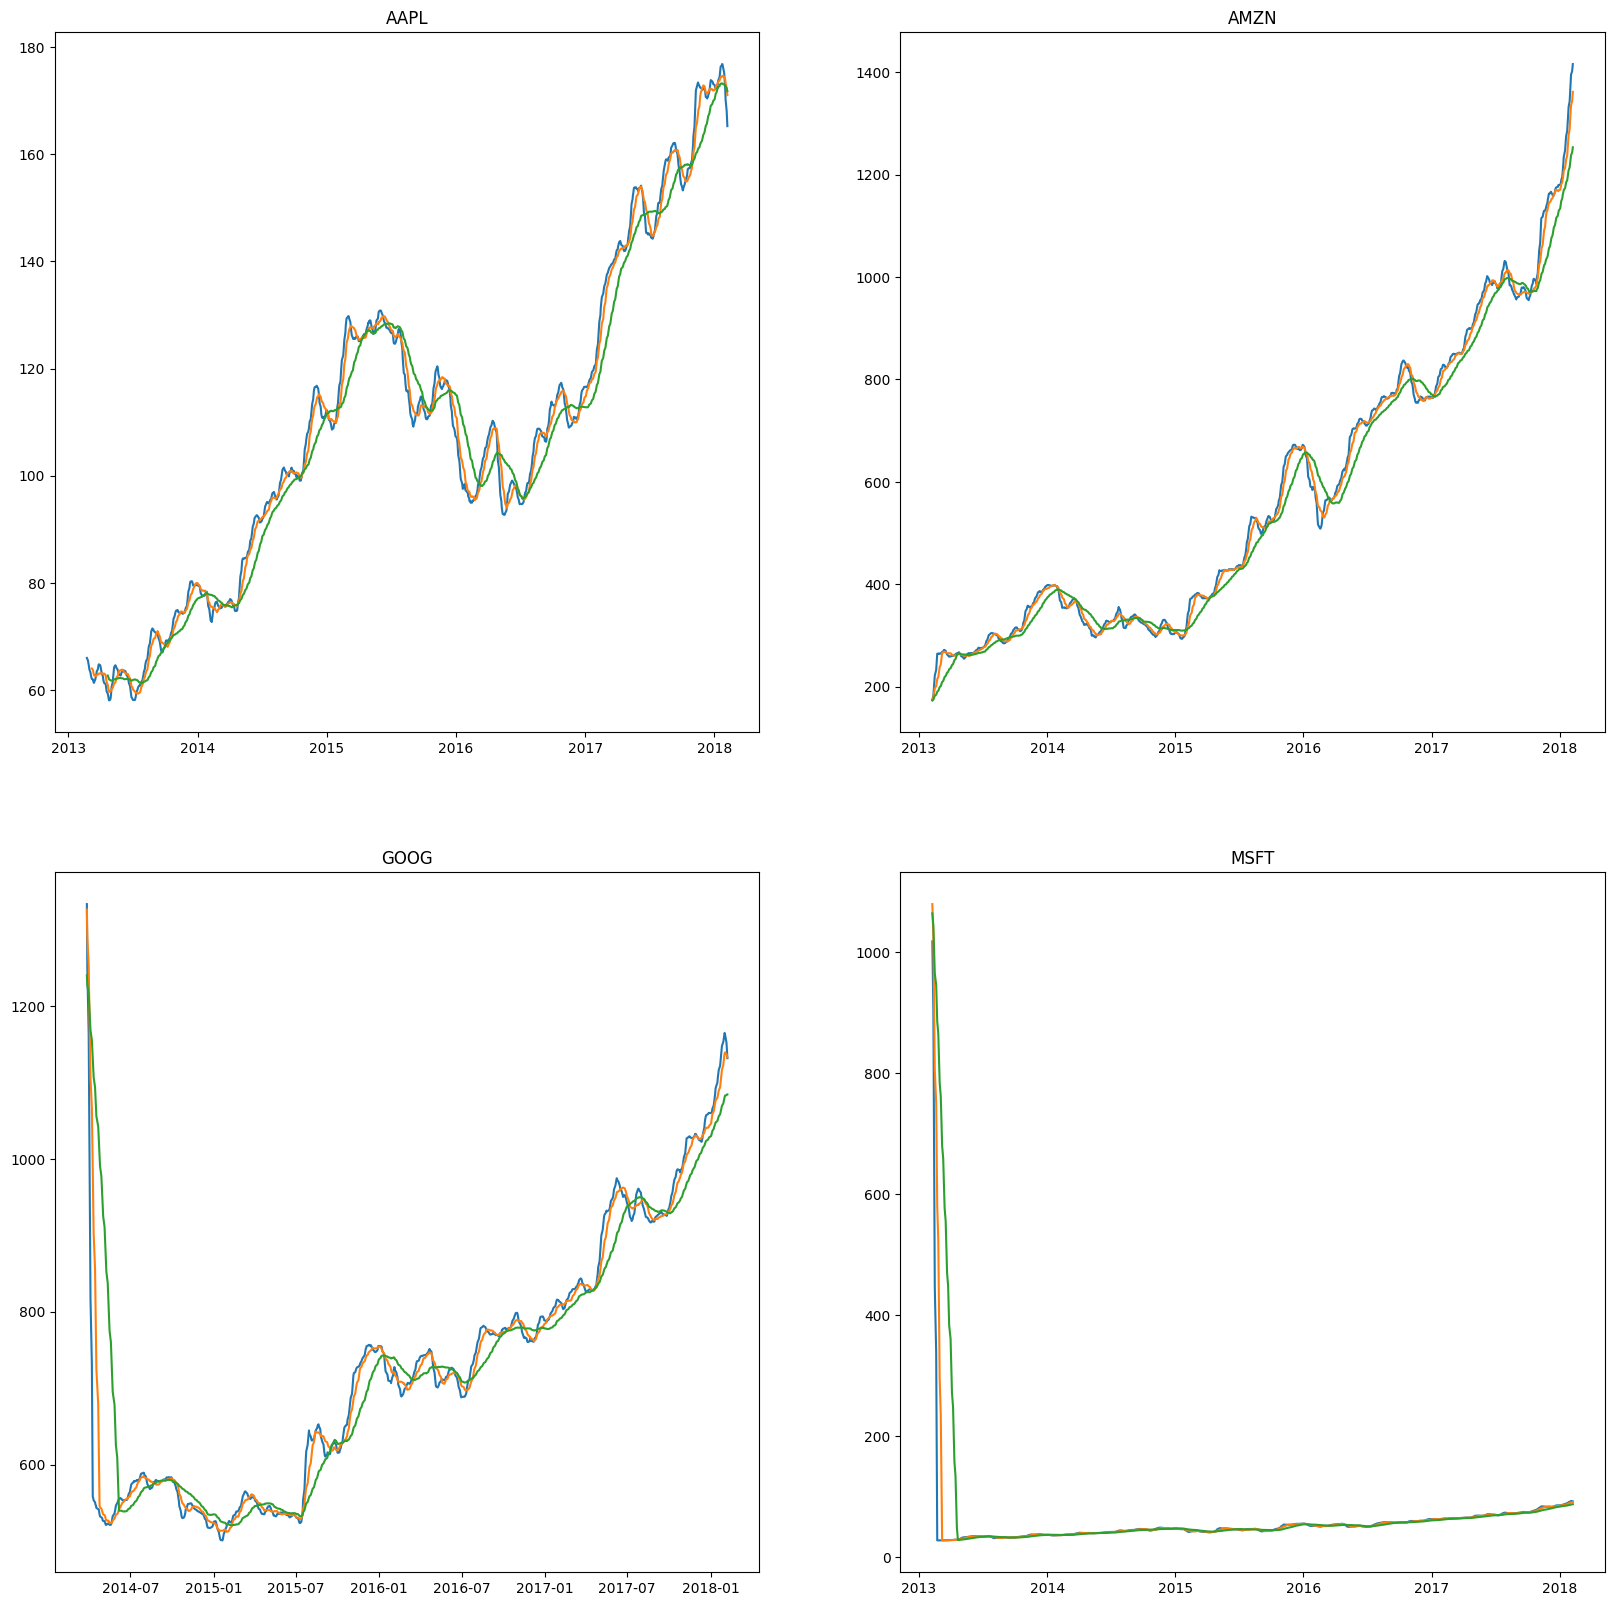

In [17]:
# Plotting the closing price of all companies
plt.figure(figsize=(20,20))
for index, company in enumerate(tech_list , 1):
    plt.subplot(2, 2, index) 
    filter1 = new_data['Name']==company
    df = new_data[filter1]
    plt.plot(df['date'] , df['close_10']) 
    plt.plot(df['date'] , df['close_20']) 
    plt.plot(df['date'] , df['close_50']) 
    plt.title(company)

In [18]:
# Analyse Closing price change in 'Apple' stock
aapl_df=pd.read_csv(r'/Users/puravdoshi/Desktop/Data Analysis with Python/Data Analytics Projects/S_and_P_TimeSeries/individual_stocks_5yr/AAPL_data.csv')
aapl_df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [19]:
# pct_change() returns : Percentage change between the current and a prior element.
aapl_df['Daily return(in %)'] = aapl_df['close'].pct_change() * 100
aapl_df.head()

,date,open,high,low,close,volume,Name,Daily return(in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [20]:
import plotly.express as px
px.line(aapl_df , x="date" , y="Daily return(in %)") 

In [21]:
# Performing resampling analysis of closing data
aapl_df.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
Daily return(in %)    float64
dtype: object

In [22]:
aapl_df['date']=pd.to_datetime(aapl_df['date']) 
aapl_df.dtypes

date                  datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                          object
Daily return(in %)           float64
dtype: object

In [23]:
aapl_df.head(4)

,date,open,high,low,close,volume,Name,Daily return(in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


In [24]:
aapl_df.set_index('date',inplace=True)

In [25]:
aapl_df['close'].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: ME, Name: close, Length: 61, dtype: float64

<Axes: xlabel='date'>

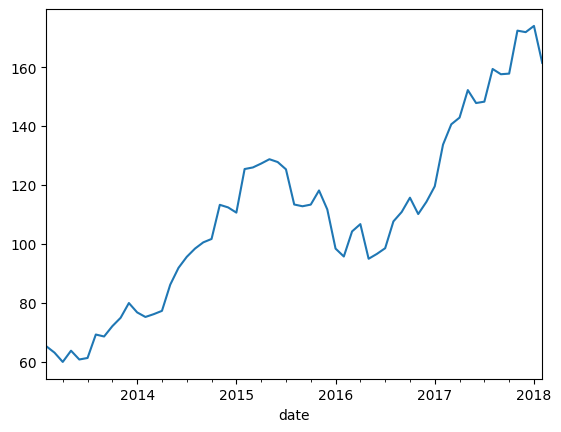

In [27]:
aapl_df['close'].resample('M').mean().plot()

<Axes: xlabel='date'>

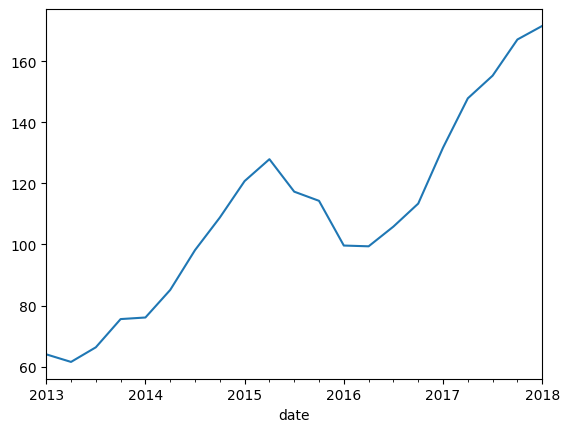

In [29]:
aapl_df['close'].resample('Q').mean().plot()

<Axes: xlabel='date'>

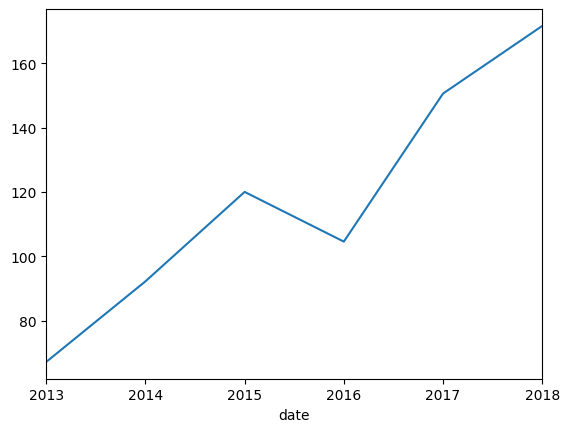

In [28]:
aapl_df['close'].resample('Y').mean().plot()

In [30]:
# Multivariate Analysis to understand correlation
'''
Here we will check if the closing prices
of all 4 tech companies are correlated or not.
'''
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [48]:
df1=pd.read_csv(company_list[0])
df2=pd.read_csv(company_list[1])
df3=pd.read_csv(company_list[2])
df4=pd.read_csv(company_list[3])
df5={
    'AAPL':df1['close'],
    'AMZN':df2['close'],
    'GOOG':df3['close'],
    'MSFT':df4['close']
}
new_df=pd.DataFrame(df5)
new_df

,AAPL,AMZN,GOOG,MSFT
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


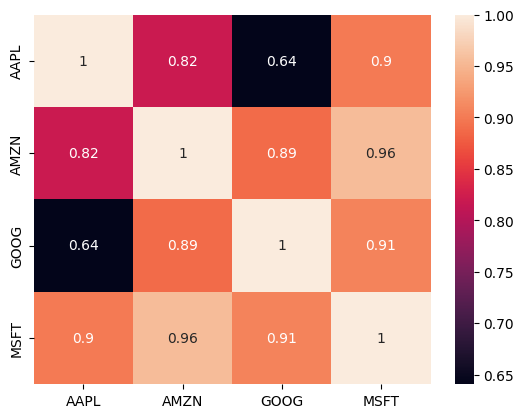

In [45]:
x=new_df.corr()
x
sns.heatmap(x,annot=True)
plt.show()

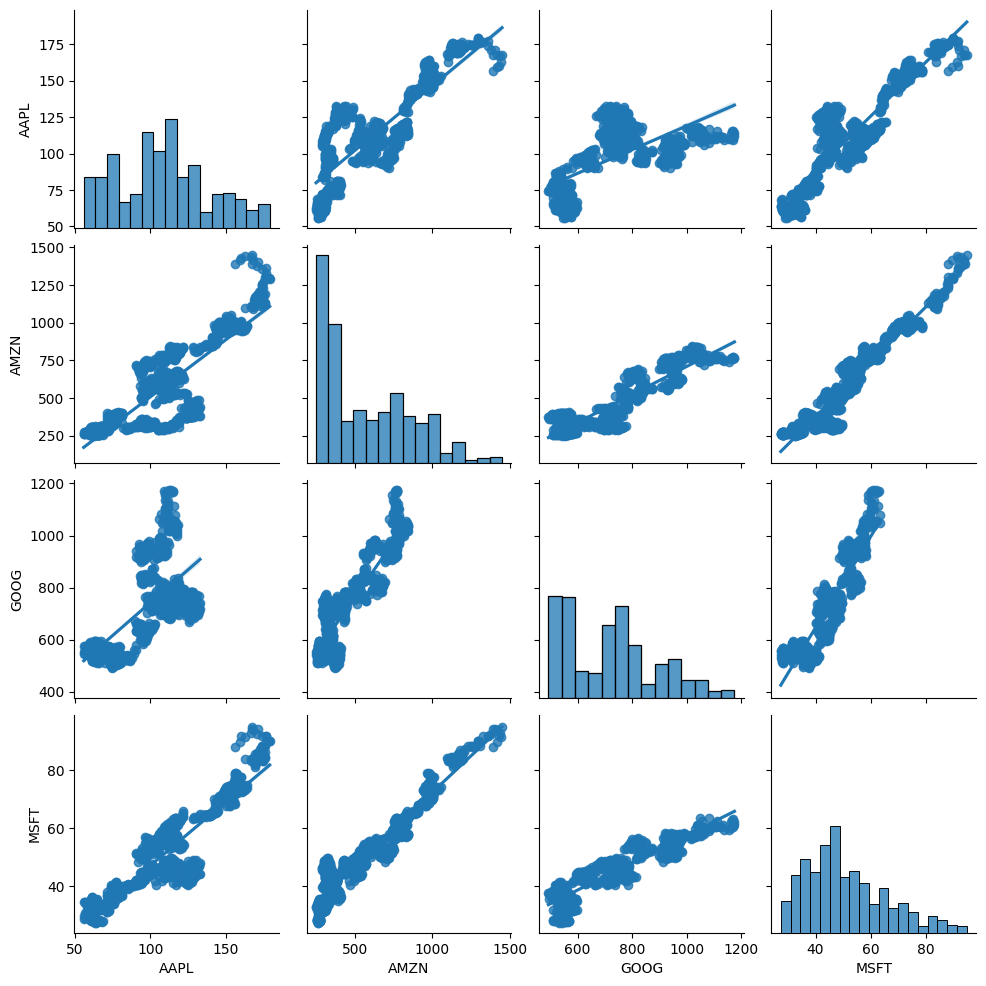

In [39]:
sns.pairplot(new_df,kind='reg')

In [47]:
# Correlation between closing price and returns
# new_df['Apple Daily return'] = new_df['AAPL'].pct_change() * 100
# new_df['Microsoft Daily return'] = new_df['MSFT'].pct_change() * 100
# new_df['Google Daily return'] = new_df['GOOG'].pct_change() * 100
# new_df['Amazon Daily return'] = new_df['AMZN'].pct_change() * 100
# new_df.head()
# Alternate - (closing_price['apple_close'] - closing_price['apple_close'].shift(1))/closing_price['apple_close'].shift(1) * 100

In [49]:
for col in new_df.columns:
    new_df[col + '_pct_change'] = (new_df[col] - new_df[col].shift(1))/new_df[col].shift(1) * 100
new_df.head()

,AAPL,AMZN,GOOG,MSFT,AAPL_pct_change,AMZN_pct_change,GOOG_pct_change,MSFT_pct_change
0,67.8542,261.95,558.46,27.55,NaN,NaN,NaN,NaN
1,68.5614,257.21,559.99,27.86,1.042235,-1.809506,0.273968,1.125227
2,66.8428,258.70,556.97,27.88,-2.506658,0.579293,-0.539295,0.071788
3,66.7156,269.47,567.16,28.03,-0.190297,4.163123,1.829542,0.538020
4,66.6556,269.24,567.00,28.04,-0.089934,-0.085353,-0.028211,0.035676


In [50]:
closing=new_df[['AAPL_pct_change','AMZN_pct_change','GOOG_pct_change','MSFT_pct_change']]
closing

,AAPL_pct_change,AMZN_pct_change,GOOG_pct_change,MSFT_pct_change
0,NaN,NaN,NaN,NaN
1,1.042235,-1.809506,0.273968,1.125227
2,-2.506658,0.579293,-0.539295,0.071788
3,-0.190297,4.163123,1.829542,0.538020
4,-0.089934,-0.085353,-0.028211,0.035676
...,...,...,...,...
1254,0.209043,-4.196734,NaN,-0.789391
1255,-4.339015,2.874101,NaN,-2.631021
1256,-2.498442,-2.793804,NaN,-4.118544
1257,4.179181,3.801439,NaN,3.784091


In [51]:
'''
Pairplot : we have histogram on diagonals & scatterplot/kde/
            any other plot which tells distribution on rest of the plot 

Pairgrid : Once we create grid , we can set plot as per our need : 
ie , if we have 4 features , it creates total 16 graphs/plots or matrices of 4*4

There would be various possibilities for type of plots in our Pairgrid which we can set as per our need :
    a) all plots can be scatterplot
    b) on diagonal , we have histogram & rest will be scatterplot
    c) on diagonal , we have histogram & rest will be kdeplot 
    c) on diagonal , we have histogram & below diagonal will be kdeplot
            & upper diagonal will be scatterplot 

Note - kdeplot for 2 features also known as contour plots which returns density
but kdeplot returns distribution if we are performing univariate analysis else it will show density 
'''

'\nPairplot : we have histogram on diagonals & scatterplot/kde/\n            any other plot which tells distribution on rest of the plot \n\nPairgrid : Once we create grid , we can set plot as per our need : \nie , if we have 4 features , it creates total 16 graphs/plots or matrices of 4*4\n\nThere would be various possibilities for type of plots in our Pairgrid which we can set as per our need :\n    a) all plots can be scatterplot\n    b) on diagonal , we have histogram & rest will be scatterplot\n    c) on diagonal , we have histogram & rest will be kdeplot \n    c) on diagonal , we have histogram & below diagonal will be kdeplot\n            & upper diagonal will be scatterplot \n\nNote - kdeplot for 2 features also known as contour plots which returns density\nbut kdeplot returns distribution if we are performing univariate analysis else it will show density \n'

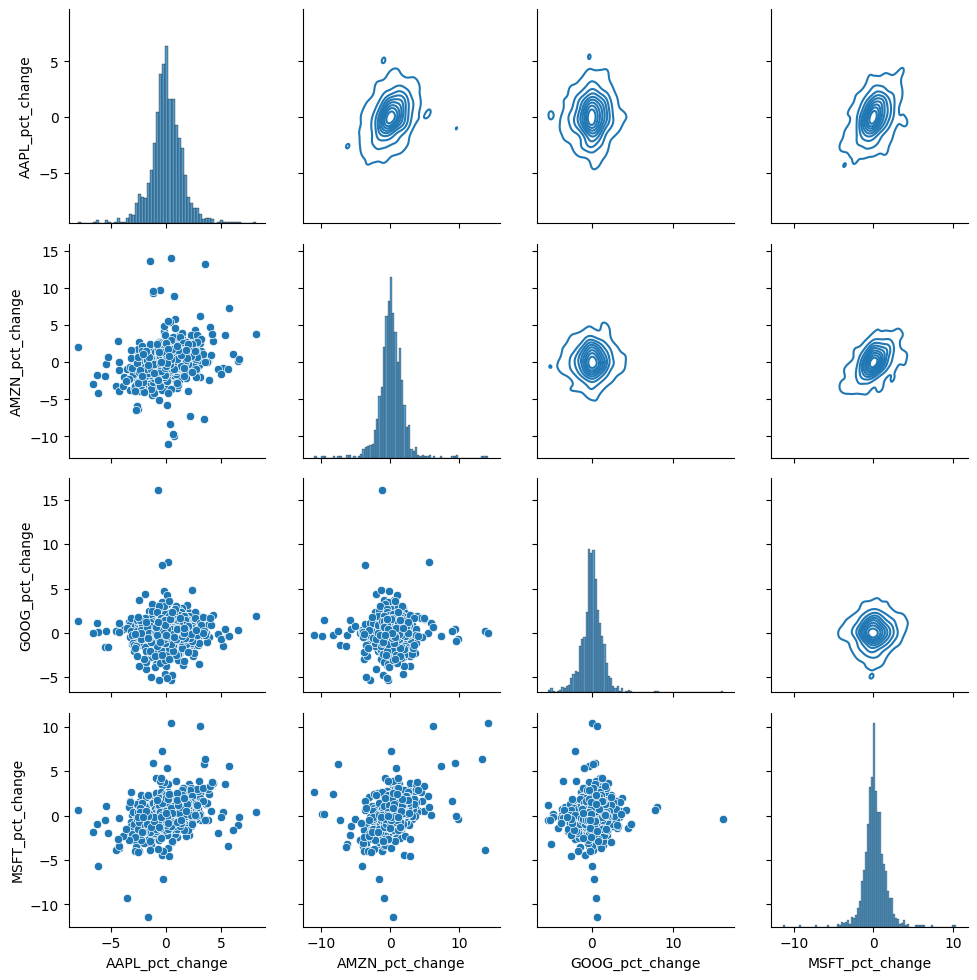

In [52]:
g = sns.PairGrid(data=closing)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [53]:
y=closing.corr()
y

,AAPL_pct_change,AMZN_pct_change,GOOG_pct_change,MSFT_pct_change
AAPL_pct_change,1.000000,0.287659,0.036202,0.366598
AMZN_pct_change,0.287659,1.000000,0.027698,0.402678
GOOG_pct_change,0.036202,0.027698,1.000000,0.038939
MSFT_pct_change,0.366598,0.402678,0.038939,1.000000
